In [1]:
import ast
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
import math
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from keras import layers
from keras import backend
from PIL import Image
from sklearn.model_selection import train_test_split
import random
random.seed(10)

In [2]:
print(1)
#tensorboard --logdir C:\Users\Matias\_Thesis\Project-Blender\Pictures\Logs

1


[[[186 134 210]
  [186 134 210]
  [186 134 210]
  ...
  [195 145 218]
  [195 145 217]
  [196 146 218]]

 [[187 135 211]
  [187 135 211]
  [187 135 211]
  ...
  [196 146 218]
  [195 145 218]
  [195 146 218]]

 [[187 135 211]
  [188 136 212]
  [188 136 212]
  ...
  [196 146 218]
  [197 147 219]
  [197 147 219]]

 ...

 [[143  71 212]
  [143  75 212]
  [144  76 212]
  ...
  [166 116 222]
  [165 115 221]
  [165 114 222]]

 [[144  72 212]
  [144  72 212]
  [144  73 212]
  ...
  [166 117 221]
  [166 117 221]
  [167 117 222]]

 [[143  71 211]
  [145  74 213]
  [144  74 212]
  ...
  [168 120 222]
  [168 120 222]
  [167 118 221]]]
(0.762185548439471, -0.5817502249392983, 5.062163611798101, 0.5589134817343122, -4, 6, 12, 3, 1, 3, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

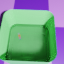

In [2]:
# path variable
picture_folder = 'C:\\Users\\Matias\\_Thesis\\Project-Blender\\Pictures\\'

# read the CSV file
df = pd.read_csv(f'{picture_folder}Metadata\\ImageData.csv')

# create a list to hold the data
images = []
labels = []


# iterate over the rows of the CSV file
for index, row in df.iterrows():
    # read in the image
    img = Image.open(f'{picture_folder}Autogenerated\\{row["ID"]}.png').convert('RGB')
    # get the x, y coordinates of the object from the CSV file
    #image_name = row["ID"]
    lego_x = row['LegoX']
    lego_y = row['LegoY']
    rot = row['legoRot']
    water_height = row['WaterHeight']
    light_x = row['LightX']
    light_y = row['LightY']
    light_z = row['LightZ']
    lego_shape = np.array(ast.literal_eval(row['lego_shape']))
    lego_shape = tf.convert_to_tensor(lego_shape, dtype=tf.float32)
    lego_shape = tf.reshape(lego_shape, [-1])
    lego_length = row['lego_length']
    lego_width = row['lego_width']
    lego_height = row['lego_height']
   # print(lego_shape.numpy())
    #if index == 1:
       # print(lego_shape)
    # add the image and coordinates to the data list
    images.append(np.array(img))
    labels.append((lego_x, lego_y, rot, water_height, light_x, light_y, light_z, lego_length, lego_width, lego_height)
                  +tuple(lego_shape.numpy()))
    #print(labels)

    #labels.append((lego_x, lego_y, rot, water_height, light_x, light_y, light_z))
print(images[232])
print(labels[232])
display(Image.fromarray(images[232]))

In [3]:
x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.2)
print(type(x_train[0]))
print(type(x_val[0]))
print(type(y_train[0]))
print(y_val[0])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'tuple'>
(-0.067722724024723, 0.5053509977862828, 0.4236121719052895, 1.7708076398513162, 2, -6, 12, 6, 3, 3, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)


In [4]:
def res_block(inp):
    inp = layers.Conv2D(64, (1,1), padding = 'same')(inp) 
    # Caused error Inputs have incompatible shapes. Received shapes (64, 64, 3) and (64, 64, 64)
    # Without above line
    layer = layers.Conv2D(64, (3,3), padding = 'same')(inp)
    layer = layers.BatchNormalization(momentum = 0.5)(layer)
    layer = layers.PReLU(shared_axes = [1,2])(layer)
    return layers.add([inp, layer])
    #model.add(layers.Conv2D(64, (3,3), padding = 'same'))
    #model.add(layers.BatchNormalization(momentum = 0.5))

temp = None
    
def deep_fish_loss(t):
    "."
    name = t
    #alpha = 0.5 # just to make this code work for now
    def loss(y_true, y_pred):
        #print("y_true: ", y_true)
        #print("y_pred: ", y_pred)
        #print(name)
        l = 0
        if name == "position":
            l = squared_loss(y_true[:,:2], y_pred)
        if name == "orientation":
            l = orientation_loss(y_true[:,2], y_pred)
        if name == "water":
            l = squared_loss(y_true[:,3], y_pred)
        if name == "xy_size":
            l = squared_loss(y_true[:,7:9], y_pred)
        if name == "z_size":
            l = squared_loss(y_true[:,9], y_pred)
        if name == "shape":
            l = dice_coef_loss(y_true[:,10:], y_pred)
        
        return l
    
    def orientation_loss(y_true, y_pred):
        y_true_f = backend.flatten(y_true)
        y_pred_f = backend.flatten(y_pred)
        diff = math.pi - abs(abs(y_true_f - y_pred_f)-math.pi) 
        return backend.mean(backend.cast(abs(diff), backend.floatx()))

    def dice_coef_loss(y_true, y_pred):
        return dice_coef(y_true, y_pred)
    
    def dice_coef(y_true, y_pred):        
        y_true_f = backend.flatten(y_true)
        y_pred_f = backend.flatten(y_pred)
        #y_pred_f = tf.where(y_pred_f < 0.5, 0., 1.)
        #y_pred_f = backend.sigmoid(y_pred_f)
        #print("---------------->", y_pred_f)
        
        intersection = backend.sum(y_true_f * y_pred_f)
        dice = (2. * intersection) / (backend.sum(y_true_f) + backend.sum(y_pred_f))
        return dice

        
    
    def squared_loss(y_true, y_pred):
        #print("y_true: ", y_true)
        #print("y_pred: ", y_pred)
        n_iter = 1
        losses = None
        y_pred = tf.convert_to_tensor(y_pred)
        y_true = tf.cast(y_true, y_pred.dtype)
        
        #losses = backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)
        losses = tf.keras.losses.mean_squared_error(y_true, y_pred)
        
        #losses = np.square(np.subtract(y_true,y_pred)).mean()
        return losses/n_iter
        #return losses
        
    return loss

#def dice_loss()

# define the model
data_augmentation = tf.keras.Sequential([
  #layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomTranslation(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1)),
  layers.RandomZoom(height_factor=(-0.1, 0.1))
])

model = keras.Sequential([
  # Add the preprocessing layers you created earlier.
  data_augmentation,
])

# add convolutional layers
input_layer = keras.Input(shape=(64, 64, 3), name="input_layer")
#input_layer = layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3))
#model.add(input_layer)
layer = layers.PReLU(shared_axes = [1,2])(input_layer)
#model.add(layers.PReLU(shared_axes = [1,2]))
num_blocks = 2
          
for i in range(num_blocks):
    layer = res_block(layer)

    
layer = layers.MaxPooling2D(2, 2)(layer)
layer = layers.Conv2D(64, (3,3), activation='relu')(layer)
layer = layers.MaxPooling2D(2, 2)(layer)
layer = layers.Conv2D(128, (3,3), activation='relu')(layer)
layer = layers.MaxPooling2D(2, 2)(layer)
layer = layers.Flatten()(layer)




# add dense layer
layer = layers.Dense(512, activation='relu')(layer)

position = layers.Dense(2, name='position')(layer)

orientation = layers.Dense(1, name='orientation')(layer)

# Water Layer
water = layers.Dense(1, name='water')(layer)

# Long/Short layer
xy_size = layers.Dense(2, name='xy_size')(layer)
# Height Layer
z_size = layers.Dense(1, name='z_size')(layer)



# Camera layer?

shape = layers.Dense(105, name='shape', activation="sigmoid")(layer)

# output layer
#model.add(layers.Dense(34))


losses = {
    "position": deep_fish_loss("position"),
    "orientation": deep_fish_loss("orientation"),
    "water": deep_fish_loss("water"),
    "xy_size": deep_fish_loss("xy_size"),
    "z_size": deep_fish_loss("z_size"),
    "shape": deep_fish_loss("shape")
}
lossWeights = {"position": 1.0, "orientation": 1.0, "water": 0.2, "xy_size": 0.8, "z_size": 0.5, "shape": 0.4}


# compile the model
#model = Model(inputs=input_layer, outputs=[position, orientation, water, shape])
model = Model(inputs=input_layer, outputs=[position, orientation, water, xy_size, z_size, shape])
model.save("C:\\Users\\Matias\\_Thesis\\Project-Blender\\Pictures\\Temp\\model.h5")
model.compile(optimizer='adam', loss=losses, loss_weights=lossWeights)


In [5]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)

#x_train = np.asarray(x_train).astype('float32')
#y_train = np.asarray(y_train).astype('float32')
#x_val = np.asarray(x_val).astype('float32')
#y_val = np.asarray(y_val).astype('float32')

print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_val))
print(np.shape(y_val))



(4800, 64, 64, 3)
(4800, 115)
(1200, 64, 64, 3)
(1200, 115)


In [8]:
callbacks = [TensorBoard(log_dir=f'{picture_folder}\\Logs',
                         histogram_freq=1,
                         write_graph=True,
                         write_images=True,
                         update_freq='epoch',
                         profile_batch=2,
                         embeddings_freq=1),
             ModelCheckpoint(f'{picture_folder}\\Models\\model_best.h5',
                            save_best_only=True)
            ]

model.fit(x_train, y_train, epochs=200, validation_data=(x_val, y_val), callbacks=callbacks, batch_size=64)

Epoch 1/200
75/75 [==============================] - 105s 1s/step - loss: 3.9470 - position_loss: 0.3000 - orientation_loss: 1.5668 - water_loss: 0.3539 - xy_size_loss: 2.0697 - z_size_loss: 0.6852 - shape_loss: 0.0276 - val_loss: 4.2184 - val_position_loss: 0.3043 - val_orientation_loss: 1.5824 - val_water_loss: 0.3482 - val_xy_size_loss: 2.2159 - val_z_size_loss: 0.9562 - val_shape_loss: 0.0281
Epoch 2/200
75/75 [==============================] - 105s 1s/step - loss: 3.7400 - position_loss: 0.2579 - orientation_loss: 1.5754 - water_loss: 0.3486 - xy_size_loss: 1.8146 - z_size_loss: 0.7575 - shape_loss: 0.0164 - val_loss: 4.1022 - val_position_loss: 0.4427 - val_orientation_loss: 1.6290 - val_water_loss: 0.3972 - val_xy_size_loss: 1.9158 - val_z_size_loss: 0.8234 - val_shape_loss: 0.0168
Epoch 3/200
75/75 [==============================] - 105s 1s/step - loss: 3.2427 - position_loss: 0.1936 - orientation_loss: 1.5830 - water_loss: 0.3316 - xy_size_loss: 1.3306 - z_size_loss: 0.6660 - 

75/75 [==============================] - 101s 1s/step - loss: 2.3512 - position_loss: 0.0730 - orientation_loss: 1.4083 - water_loss: 0.2760 - xy_size_loss: 0.6360 - z_size_loss: 0.6119 - shape_loss: 8.2782e-05 - val_loss: 2.6087 - val_position_loss: 0.0835 - val_orientation_loss: 1.6048 - val_water_loss: 0.2809 - val_xy_size_loss: 0.7060 - val_z_size_loss: 0.5985 - val_shape_loss: 1.1395e-04
Epoch 22/200
75/75 [==============================] - 96s 1s/step - loss: 2.2947 - position_loss: 0.0708 - orientation_loss: 1.3802 - water_loss: 0.2790 - xy_size_loss: 0.6104 - z_size_loss: 0.5992 - shape_loss: 8.2387e-05 - val_loss: 2.5924 - val_position_loss: 0.0785 - val_orientation_loss: 1.5941 - val_water_loss: 0.2940 - val_xy_size_loss: 0.7010 - val_z_size_loss: 0.6004 - val_shape_loss: 1.2303e-04
Epoch 23/200
75/75 [==============================] - 99s 1s/step - loss: 2.3264 - position_loss: 0.0711 - orientation_loss: 1.3903 - water_loss: 0.2821 - xy_size_loss: 0.6240 - z_size_loss: 0.618

75/75 [==============================] - 104s 1s/step - loss: 2.0039 - position_loss: 0.0599 - orientation_loss: 1.1766 - water_loss: 0.2779 - xy_size_loss: 0.4980 - z_size_loss: 0.6269 - shape_loss: 3.4637e-05 - val_loss: 2.7907 - val_position_loss: 0.0864 - val_orientation_loss: 1.6434 - val_water_loss: 0.2826 - val_xy_size_loss: 0.8689 - val_z_size_loss: 0.6185 - val_shape_loss: 2.4558e-05
Epoch 42/200
75/75 [==============================] - 105s 1s/step - loss: 1.9913 - position_loss: 0.0622 - orientation_loss: 1.1603 - water_loss: 0.2836 - xy_size_loss: 0.4997 - z_size_loss: 0.6243 - shape_loss: 3.7318e-05 - val_loss: 2.5905 - val_position_loss: 0.0735 - val_orientation_loss: 1.5997 - val_water_loss: 0.2763 - val_xy_size_loss: 0.7016 - val_z_size_loss: 0.6016 - val_shape_loss: 5.9958e-05
Epoch 43/200
75/75 [==============================] - 104s 1s/step - loss: 1.9073 - position_loss: 0.0571 - orientation_loss: 1.1213 - water_loss: 0.2720 - xy_size_loss: 0.4663 - z_size_loss: 0.6

75/75 [==============================] - 102s 1s/step - loss: 1.6404 - position_loss: 0.0532 - orientation_loss: 0.9139 - water_loss: 0.2781 - xy_size_loss: 0.3896 - z_size_loss: 0.6119 - shape_loss: 1.6548e-05 - val_loss: 2.6287 - val_position_loss: 0.0807 - val_orientation_loss: 1.6227 - val_water_loss: 0.2822 - val_xy_size_loss: 0.7069 - val_z_size_loss: 0.6067 - val_shape_loss: 1.6718e-05
Epoch 62/200
75/75 [==============================] - 105s 1s/step - loss: 1.6456 - position_loss: 0.0534 - orientation_loss: 0.9099 - water_loss: 0.2812 - xy_size_loss: 0.3968 - z_size_loss: 0.6173 - shape_loss: 1.5468e-05 - val_loss: 2.6485 - val_position_loss: 0.0801 - val_orientation_loss: 1.6215 - val_water_loss: 0.2847 - val_xy_size_loss: 0.7363 - val_z_size_loss: 0.6019 - val_shape_loss: 9.5162e-06
Epoch 63/200
75/75 [==============================] - 103s 1s/step - loss: 1.5730 - position_loss: 0.0512 - orientation_loss: 0.8707 - water_loss: 0.2735 - xy_size_loss: 0.3660 - z_size_loss: 0.6

75/75 [==============================] - 107s 1s/step - loss: 1.3506 - position_loss: 0.0449 - orientation_loss: 0.7011 - water_loss: 0.2748 - xy_size_loss: 0.2993 - z_size_loss: 0.6203 - shape_loss: 6.7662e-06 - val_loss: 2.7013 - val_position_loss: 0.0763 - val_orientation_loss: 1.6564 - val_water_loss: 0.2782 - val_xy_size_loss: 0.7537 - val_z_size_loss: 0.6200 - val_shape_loss: 9.3210e-06
Epoch 82/200
75/75 [==============================] - 102s 1s/step - loss: 1.3164 - position_loss: 0.0439 - orientation_loss: 0.6833 - water_loss: 0.2752 - xy_size_loss: 0.2874 - z_size_loss: 0.6084 - shape_loss: 6.0258e-06 - val_loss: 2.6683 - val_position_loss: 0.0770 - val_orientation_loss: 1.6420 - val_water_loss: 0.2802 - val_xy_size_loss: 0.7354 - val_z_size_loss: 0.6098 - val_shape_loss: 7.6901e-06
Epoch 83/200
75/75 [==============================] - 110s 1s/step - loss: 1.3048 - position_loss: 0.0440 - orientation_loss: 0.6756 - water_loss: 0.2737 - xy_size_loss: 0.2781 - z_size_loss: 0.6

75/75 [==============================] - 108s 1s/step - loss: 1.1147 - position_loss: 0.0374 - orientation_loss: 0.5500 - water_loss: 0.2736 - xy_size_loss: 0.2167 - z_size_loss: 0.5985 - shape_loss: 3.0849e-06 - val_loss: 2.7033 - val_position_loss: 0.0765 - val_orientation_loss: 1.5934 - val_water_loss: 0.2893 - val_xy_size_loss: 0.8237 - val_z_size_loss: 0.6333 - val_shape_loss: 4.5362e-06
Epoch 102/200
75/75 [==============================] - 105s 1s/step - loss: 1.1172 - position_loss: 0.0382 - orientation_loss: 0.5539 - water_loss: 0.2774 - xy_size_loss: 0.2072 - z_size_loss: 0.6076 - shape_loss: 3.1492e-06 - val_loss: 2.6874 - val_position_loss: 0.0704 - val_orientation_loss: 1.6217 - val_water_loss: 0.2805 - val_xy_size_loss: 0.7924 - val_z_size_loss: 0.6108 - val_shape_loss: 3.4737e-06
Epoch 103/200
75/75 [==============================] - 110s 1s/step - loss: 1.1359 - position_loss: 0.0372 - orientation_loss: 0.5668 - water_loss: 0.2740 - xy_size_loss: 0.2159 - z_size_loss: 0

75/75 [==============================] - 103s 1s/step - loss: 0.9668 - position_loss: 0.0303 - orientation_loss: 0.4521 - water_loss: 0.2764 - xy_size_loss: 0.1594 - z_size_loss: 0.6031 - shape_loss: 1.2745e-06 - val_loss: 2.7373 - val_position_loss: 0.0733 - val_orientation_loss: 1.6246 - val_water_loss: 0.2785 - val_xy_size_loss: 0.8475 - val_z_size_loss: 0.6116 - val_shape_loss: 1.9284e-06
Epoch 122/200
75/75 [==============================] - 105s 1s/step - loss: 1.0039 - position_loss: 0.0331 - orientation_loss: 0.4847 - water_loss: 0.2734 - xy_size_loss: 0.1618 - z_size_loss: 0.6039 - shape_loss: 1.3586e-06 - val_loss: 2.7178 - val_position_loss: 0.0749 - val_orientation_loss: 1.6293 - val_water_loss: 0.2852 - val_xy_size_loss: 0.8035 - val_z_size_loss: 0.6275 - val_shape_loss: 1.6010e-06
Epoch 123/200
75/75 [==============================] - 101s 1s/step - loss: 1.0140 - position_loss: 0.0318 - orientation_loss: 0.4821 - water_loss: 0.2697 - xy_size_loss: 0.1811 - z_size_loss: 0

75/75 [==============================] - 120s 2s/step - loss: 0.9309 - position_loss: 0.0272 - orientation_loss: 0.4279 - water_loss: 0.2703 - xy_size_loss: 0.1508 - z_size_loss: 0.6021 - shape_loss: 5.4944e-07 - val_loss: 2.7612 - val_position_loss: 0.0730 - val_orientation_loss: 1.6429 - val_water_loss: 0.3046 - val_xy_size_loss: 0.8395 - val_z_size_loss: 0.6256 - val_shape_loss: 6.5762e-07
Epoch 142/200
75/75 [==============================] - 113s 2s/step - loss: 0.9243 - position_loss: 0.0274 - orientation_loss: 0.4250 - water_loss: 0.2683 - xy_size_loss: 0.1481 - z_size_loss: 0.5997 - shape_loss: 5.9593e-07 - val_loss: 2.7690 - val_position_loss: 0.0697 - val_orientation_loss: 1.6246 - val_water_loss: 0.2741 - val_xy_size_loss: 0.8606 - val_z_size_loss: 0.6626 - val_shape_loss: 1.8762e-06
Epoch 143/200
75/75 [==============================] - 112s 1s/step - loss: 0.8863 - position_loss: 0.0279 - orientation_loss: 0.3955 - water_loss: 0.2681 - xy_size_loss: 0.1373 - z_size_loss: 0

75/75 [==============================] - 106s 1s/step - loss: 0.8418 - position_loss: 0.0236 - orientation_loss: 0.3719 - water_loss: 0.2631 - xy_size_loss: 0.1235 - z_size_loss: 0.5896 - shape_loss: 2.8998e-07 - val_loss: 2.7806 - val_position_loss: 0.0672 - val_orientation_loss: 1.6272 - val_water_loss: 0.2731 - val_xy_size_loss: 0.8840 - val_z_size_loss: 0.6486 - val_shape_loss: 2.8987e-07
Epoch 162/200
75/75 [==============================] - 106s 1s/step - loss: 0.8613 - position_loss: 0.0237 - orientation_loss: 0.3812 - water_loss: 0.2634 - xy_size_loss: 0.1275 - z_size_loss: 0.6033 - shape_loss: 2.6458e-07 - val_loss: 2.7079 - val_position_loss: 0.0656 - val_orientation_loss: 1.6369 - val_water_loss: 0.2669 - val_xy_size_loss: 0.8057 - val_z_size_loss: 0.6149 - val_shape_loss: 7.0376e-07
Epoch 163/200
75/75 [==============================] - 103s 1s/step - loss: 0.8311 - position_loss: 0.0235 - orientation_loss: 0.3721 - water_loss: 0.2666 - xy_size_loss: 0.1101 - z_size_loss: 0

75/75 [==============================] - 107s 1s/step - loss: 0.8488 - position_loss: 0.0214 - orientation_loss: 0.3722 - water_loss: 0.2572 - xy_size_loss: 0.1386 - z_size_loss: 0.5858 - shape_loss: 1.7235e-07 - val_loss: 2.7162 - val_position_loss: 0.0672 - val_orientation_loss: 1.6026 - val_water_loss: 0.2594 - val_xy_size_loss: 0.8641 - val_z_size_loss: 0.6063 - val_shape_loss: 2.9932e-07
Epoch 182/200
75/75 [==============================] - 119s 2s/step - loss: 0.8123 - position_loss: 0.0211 - orientation_loss: 0.3581 - water_loss: 0.2573 - xy_size_loss: 0.1084 - z_size_loss: 0.5900 - shape_loss: 1.3874e-07 - val_loss: 2.6858 - val_position_loss: 0.0657 - val_orientation_loss: 1.5940 - val_water_loss: 0.2609 - val_xy_size_loss: 0.8278 - val_z_size_loss: 0.6234 - val_shape_loss: 3.0159e-07
Epoch 183/200
75/75 [==============================] - 125s 2s/step - loss: 0.7996 - position_loss: 0.0202 - orientation_loss: 0.3556 - water_loss: 0.2589 - xy_size_loss: 0.0987 - z_size_loss: 0

In [25]:
predictions = model.predict(x_val[:50])
actual = y_val[:50]

# Add predicted metadata

lego_x = lego_y = lego_rot = water = light_x = light_y = light_z = 0

for i in range(len(predictions)):
    pred = predictions[i]
    actu = actual[i]
    lego_x += max(pred[0], actu[0]) - min(pred[0], actu[0])
    lego_y += max(pred[1], actu[1]) - min(pred[1], actu[1])
    lego_rot += max(pred[2], actu[2]) - min(pred[2], actu[2])
    water += max(pred[3], actu[3]) - min(pred[3], actu[3])
    light_x += max(pred[4], actu[4]) - min(pred[4], actu[4])
    light_y += max(pred[5], actu[5]) - min(pred[5], actu[5])
    light_z += max(pred[6], actu[6]) - min(pred[6], actu[6])
    display(Image.fromarray(x_val[i], 'RGB'))
    
print("lego_x average failure: ", lego_x/50)
print("lego_y average failure: ", lego_y/50)
print("lego_rot average failure: ", lego_rot/50)
print("water average failure: ", water/50)
print("light_x average failure: ", light_x/50)
print("light_y average failure: ", light_y/50)
print("light_z average failure: ", light_z/50)



2/2 [==============================] - 1s 253ms/step


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [10]:
model = tf.keras.models.load_model(
    "C:\\Users\\Matias\\_Thesis\\Project-Blender\\Pictures\\Models\\model_best.h5", custom_objects={ 'loss':losses, 'loss_weights':lossWeights}, compile=True
)

In [19]:
predictions = model.predict(x_val[:50])
#print(y_val[0])
actual = y_val[:50]
#print(actual)
#for i in range(len(predictions)):
#    print("num", i)
#print(actual[0])
print([elem[0] for elem in predictions])
x = [i[0] for i in predictions[0]]
y = [i[1] for i in predictions[0]]
#print(backend.sigmoid(5.0))
act_x = [i[0] for i in actual]
act_y = [i[1] for i in actual]

#print(act_x)
#print(act_y)
#print(predictions[2])
#msd = backend.mean(tf.math.squared_difference(x, act_x), axis=-1)
#print("msd:", msd)
#actual_msd = backend.mean(tf.math.squared_difference(x, y), axis=-1)
#for i in predictions[0]:
#    print(i)
#print(predictions)
#    
#print(y_val[1])
#print(temp)

2/2 [==============================] - 0s 118ms/step
[array([-0.28716016,  0.18735138], dtype=float32), array([-2.7576575], dtype=float32), array([0.8341846], dtype=float32), array([5.0843487, 1.9302536], dtype=float32), array([1.8745627], dtype=float32), array([3.03331049e-09, 4.18243228e-15, 1.16972820e-10, 2.21320222e-13,
       1.22115741e-14, 2.92467877e-16, 1.31802977e-08, 2.20356475e-13,
       1.59739382e-13, 1.54160915e-08, 2.12016626e-09, 3.88194543e-08,
       1.62607148e-06, 5.00843456e-09, 2.32602346e-07, 1.02252693e-13,
       8.23250301e-10, 6.39041839e-14, 3.15002226e-11, 7.04726633e-09,
       5.76539233e-11, 6.56427801e-09, 1.51019947e-10, 3.53023231e-12,
       5.00649244e-10, 1.06683877e-10, 3.70099293e-08, 2.50684661e-06,
       3.45104709e-08, 4.51006965e-09, 1.00085357e-10, 2.61935473e-09,
       6.60205668e-10, 3.52370411e-10, 1.86511140e-09, 5.18120736e-16,
       4.76987472e-09, 1.07941726e-12, 1.50736348e-08, 1.86427037e-11,
       3.06081347e-08, 6.93187374e

tf.Tensor(
[0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5000004  0.5        0.50000006 0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.50000066 0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.50000006
 0.5000002  0.5000002  0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5000001  0.50000006 0.50000006
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.50000006 0.5000001  0.50000006 0.5        0.5        0.5
 0.50000006 0.5        0.5        0.5        0.5        0.50000006
 0.50000006 0.5        0.5        0.5000017  0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.50000

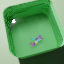

In [58]:
#print("Predictions 0:", predictions[0])
#print("Predictions 1:", predictions[1])
#print("Predictions 2:", predictions[2])

legoXPred = [i[0] for i in predictions[0]]
legoYPred = [i[1] for i in predictions[0]]
legoRotPred = predictions[1].tolist()
waterHeight = predictions[2].tolist()
legoLengthPred = [i[0] for i in predictions[3]]
legoWidthPred = [i[1] for i in predictions[3]]
legoHeightPred = predictions[4].tolist()
legoShapePred = backend.sigmoid(predictions[5].tolist())

trueX = [i[0] for i in actual]
trueY = [i[1] for i in actual]
trueRot = [i[2] for i in actual]
trueWaterHeight = [i[3] for i in actual]
lightX = [i[4] for i in actual]
lightY = [i[5] for i in actual]
lightZ = [i[6] for i in actual]
lego_length = [i[7] for i in actual]
lego_width = [i[8] for i in actual]
lego_height = [i[9] for i in actual]
trueShape = [i[10:] for i in actual]
print(legoShapePred[0])
#for i in TrueShape[0]:
#    print(i)
print(trueShape[0])
#print(np.reshape(backend.sigmoid(LegoShapePred[0]), (7,5,3)).tolist())
#print(np.reshape(TrueShape[0], (7,5,3)).tolist())
#temp = [LegoXPred[0], LegoYPred[0], LegoRotPred[0][0], backend.sigmoid(LegoShapePred[0]), TrueX[0], TrueY[0], TrueRot[0], len(TrueShape[0])]
#print(temp)
#temp = [0 if x < 0.5 else 1 for x in backend.sigmoid(LegoShapePred[0])]
#avg = sum(LegoShapePred[0]) / len(LegoShapePred[0])
#temp = [0 if x < avg else 1 for x in LegoShapePred[0]]

#print(avg)
#print(LegoShapePred[3])
#print("Max:", max(LegoShapePred[3]))
#print("Min:", min(LegoShapePred[3]))
#print(len(LegoShapePred[3]))
#print(sum([x>avg for x in LegoShapePred[3]]))

#print(sum(TrueShape[0]))
#print(sum(temp))
def dice_coef_loss(y_true, y_pred):
    return dice_coef(y_true, y_pred)
    
def dice_coef(y_true, y_pred):        
    y_true_f = backend.flatten(y_true)
    y_pred_f = backend.flatten(y_pred)
    #y_pred_f = tf.where(y_pred_f < 0.5, 0., 1.)
    
    y_true = tf.cast(y_true, backend.floatx())
    y_pred_f = tf.cast(y_pred_f, backend.floatx())
    #print("---------------->", y_pred_f)
    
    intersection = backend.sum(y_true_f * y_pred_f)
    dice = (2. * intersection) / (backend.sum(y_true_f) + backend.sum(y_pred_f))
    return dice
#print(dice_coef_loss(LegoShapePred[0], TrueShape[0]))


display(Image.fromarray(x_val[0]))

In [37]:
headerPred = ["LegoXPred", "LegoYPred", "LegoRotPred", "WaterHeight", "LegoShapePred", 
              "lego_length_Pred", "lego_width_Pred", "lego_height_Pred"]
with open(f'{picture_folder}Metadata\\RecreatedImageData.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(headerPred)
    for i in range(50):
        avg = sum(legoShapePred[i]) / len(LegoShapePred[i])
        temp = [0 if x < avg else 1 for x in LegoShapePred[i]]
        row = [legoXPred[i], legoYPred[i], legoRotPred[i][0], waterHeight[i][0], np.reshape(temp, (7,5,3)).tolist(), 
              legoLengthPred[i], legoWidthPred[i], legoHeightPred[i][0]]
        #print(row)
        writer.writerow(row)
        
headerTrue = ["LegoX", "LegoY", "LegoRot", "WaterHeight", "LightX", "LightY", "LightZ",
              "TrueShape", "lego_length", "lego_width", "lego_height"]
with open(f'{picture_folder}Metadata\\TrueImageData.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(headerTrue)
    for i in range(50):
        row = [trueX[i], trueY[i], trueRot[i], trueWaterHeight[i], 
               lightX[i], lightY[i], lightZ[i], np.reshape(trueShape[i], (7,5,3)).tolist(), 
               lego_length[i], lego_width[i], lego_height[i]]
        #print(row)
        writer.writerow(row)
#print(type(x_val[0]))        
for i in range(len(x_val)):
    img = Image.fromarray(x_val[i], 'RGB')
    img.save(f"C:\\Users\\Matias\\_Thesis\\Project-Blender\\Pictures\\Predictions\\image_{i}_Actual.jpg")
    


In [28]:
# """ Create Comparison Document """

header = ["LegoXPred", "LegoYPred", "LegoRotPred", "WaterHeightPred", "lego_length_Pred", "lego_width_Pred", "lego_height_Pred",
          "LegoXTrue", "LegoYTrue", "LegoRotTrue", "WaterHeightTrue", "lego_length_True", "lego_width_True", "lego_height_True",
          "LegoXComp", "LegoYComp", "LegoRotComp", "WaterHeightComp", "lego_length_Comp", "lego_width_Comp", "lego_height_Comp",]

with open(f'{picture_folder}Metadata\\ComparedImageData.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for i in range(50):
        compX = abs(legoXPred[i] - trueX[i])
        compY = abs(legoYPred[i] - trueY[i])
        compRot = abs(legoRotPred[i][0] - trueRot[i])
        compWater = abs(waterHeight[i][0] - trueWaterHeight[i])
        compLength = abs(legoLengthPred[i] - lego_length[i])
        compWidth = abs(legoWidthPred[i] - lego_width[i])
        compHeight = abs(legoHeightPred[i][0] - lego_height[i])
        row = [legoXPred[i], legoYPred[i], legoRotPred[i][0], waterHeight[i][0], legoLengthPred[i], legoWidthPred[i], legoHeightPred[i][0],
              trueX[i], trueY[i], trueRot[i], trueWaterHeight[i], lego_length[i], lego_width[i], lego_height[i],
              compX, compY, compRot, compWater, compLength, compWidth, compHeight]
        writer.writerow(row)

Average X miss:  0.14449325532099608
Average Y miss:  0.2176533707146797
Average Rot miss:  1.6500701324360543
Average Water miss:  0.46634110507192456
Average Length miss:  0.9561750316619873
Average width miss:  0.4939356064796448
Average height miss:  0.7608392381668091

------Image-0-------


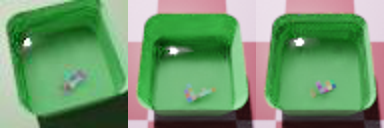


------Image-1-------


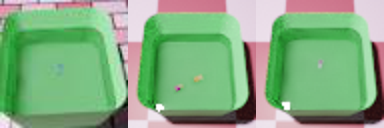


------Image-2-------


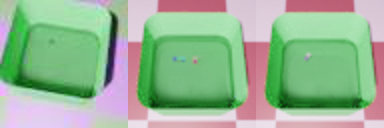


------Image-3-------


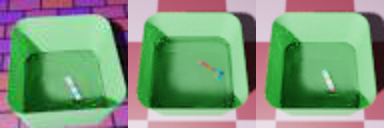


------Image-4-------


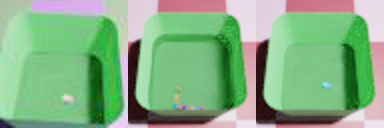


------Image-5-------


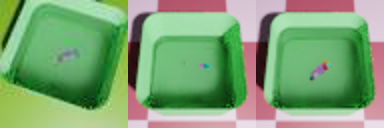


------Image-6-------


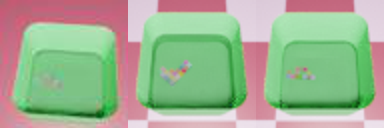


------Image-7-------


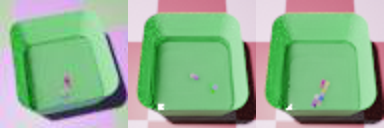


------Image-8-------


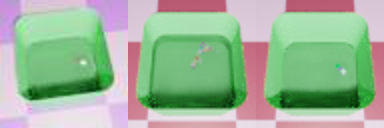


------Image-9-------


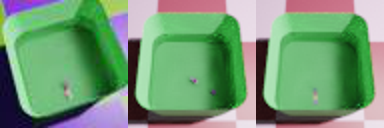


------Image-10-------


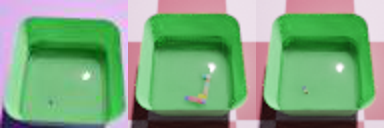


------Image-11-------


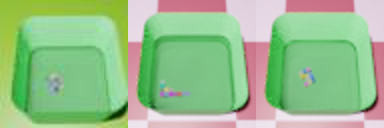


------Image-12-------


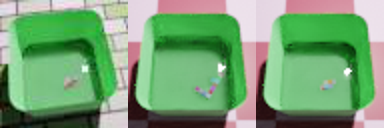


------Image-13-------


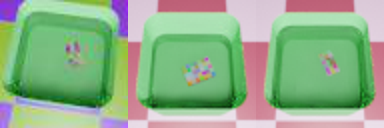


------Image-14-------


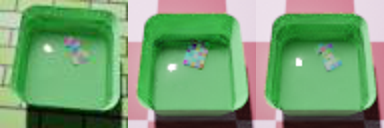


------Image-15-------


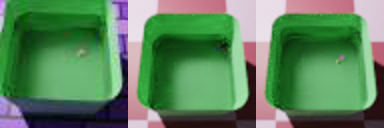


------Image-16-------


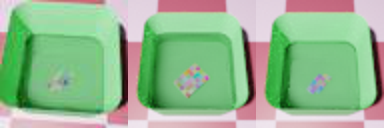


------Image-17-------


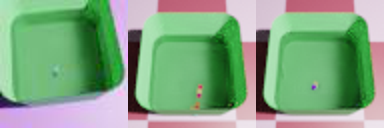


------Image-18-------


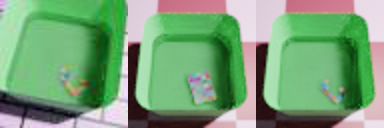


------Image-19-------


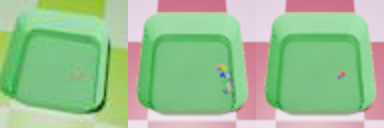


------Image-20-------


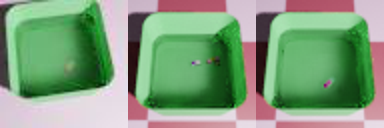


------Image-21-------


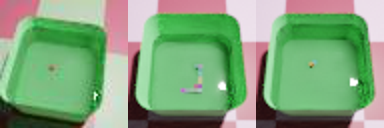


------Image-22-------


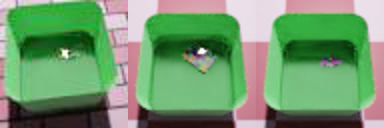


------Image-23-------


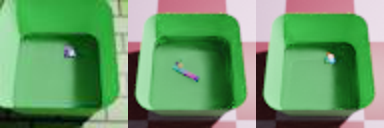


------Image-24-------


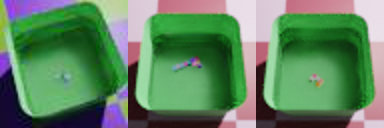


------Image-25-------


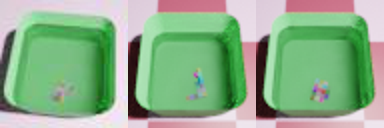


------Image-26-------


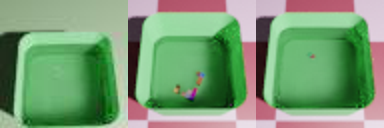


------Image-27-------


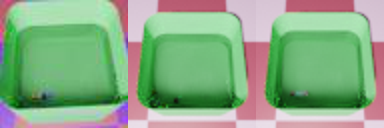


------Image-28-------


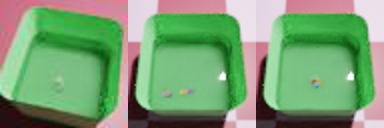


------Image-29-------


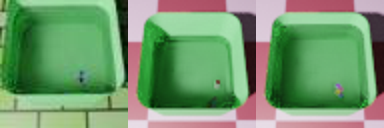


------Image-30-------


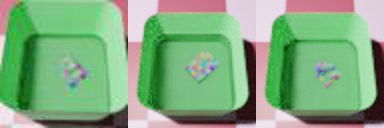


------Image-31-------


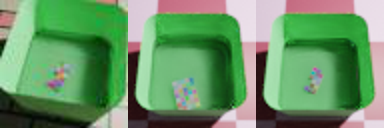


------Image-32-------


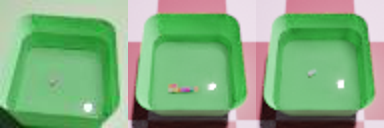


------Image-33-------


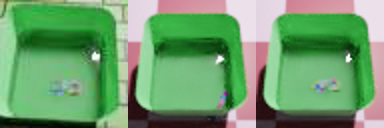


------Image-34-------


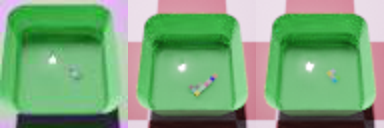


------Image-35-------


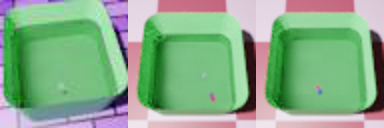


------Image-36-------


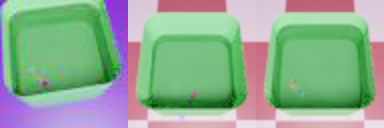


------Image-37-------


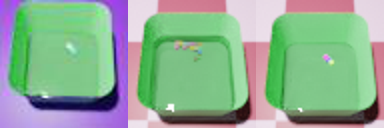


------Image-38-------


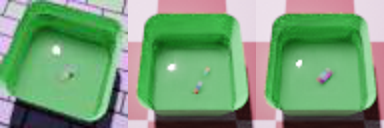


------Image-39-------


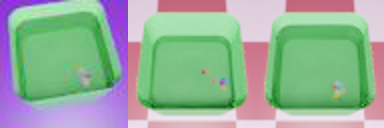


------Image-40-------


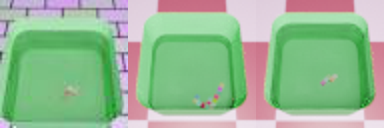


------Image-41-------


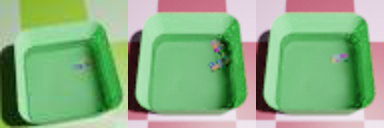


------Image-42-------


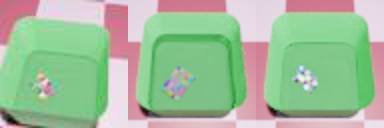


------Image-43-------


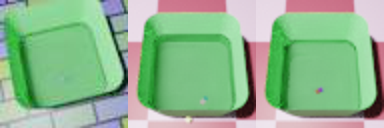


------Image-44-------


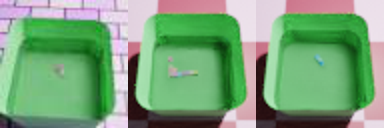


------Image-45-------


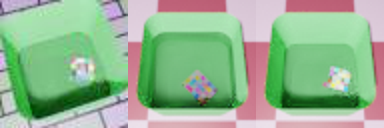


------Image-46-------


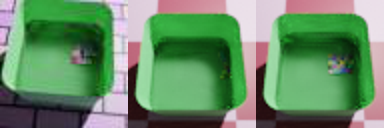


------Image-47-------


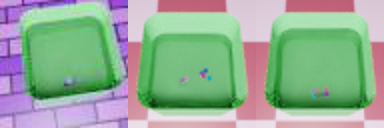


------Image-48-------


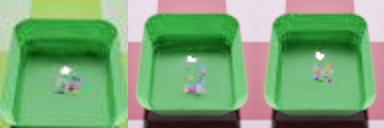


------Image-49-------


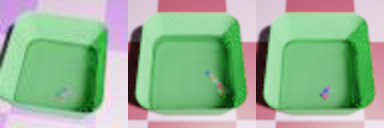

In [55]:
df = pd.read_csv(f'{picture_folder}Metadata\\ComparedImageData.csv')
#print(df)
legoXCompSum = df["LegoXComp"].sum()
legoYCompSum = df["LegoYComp"].sum()
df["LegoRotComp"] = df["LegoRotComp"] % math.pi
legoRotCompSum = df["LegoRotComp"].sum()
WaterHeightCompSum   = df["WaterHeightComp"].sum()
lego_length_CompSum = df["lego_length_Comp"].sum()
lego_width_CompSum = df["lego_width_Comp"].sum()
lego_height_CompSum = df["lego_height_Comp"].sum()

#print()

print("Average X miss: ", legoXCompSum/50)
print("Average Y miss: ", legoYCompSum/50)
print("Average Rot miss: ", legoRotCompSum/50)
print("Average Water miss: ", WaterHeightCompSum/50)
print("Average Length miss: ", lego_length_CompSum/50)
print("Average width miss: ", lego_width_CompSum/50)
print("Average height miss: ", lego_height_CompSum/50)

for i in range(50):
    img_actual = Image.open(f'C:\\Users\\Matias\\_Thesis\\Project-Blender\\Pictures\\Predictions\\image_{i}_Actual.jpg').convert('RGB')
    img_pred = Image.open(f'C:\\Users\\Matias\\_Thesis\\Project-Blender\\Pictures\\Predictions\\image_{i}_Pred.png').convert('RGB')
    img_true = Image.open(f'C:\\Users\\Matias\\_Thesis\\Project-Blender\\Pictures\\Predictions\\image_{i}_True.png').convert('RGB')
    
    new_size = (128, 128)
    
    # Resize the image
    img_actual = img_actual.resize(new_size)
    img_pred = img_pred.resize(new_size)
    img_true = img_true.resize(new_size)
    
    im_combined = Image.new('RGB', (img_actual.width + img_pred.width + img_true.width, img_true.height))
    im_combined.paste(img_actual, (0, 0))
    im_combined.paste(img_pred, (img_actual.width, 0))
    im_combined.paste(img_true, (img_actual.width + img_pred.width, 0))

    # Display the resized image
    print(f"\n------Image-{i}-------")
    display(im_combined)
    
    
    #display(img_actual.thumbnail((256, 256)))
    #display(img_pred)
    #display(img_true)
    

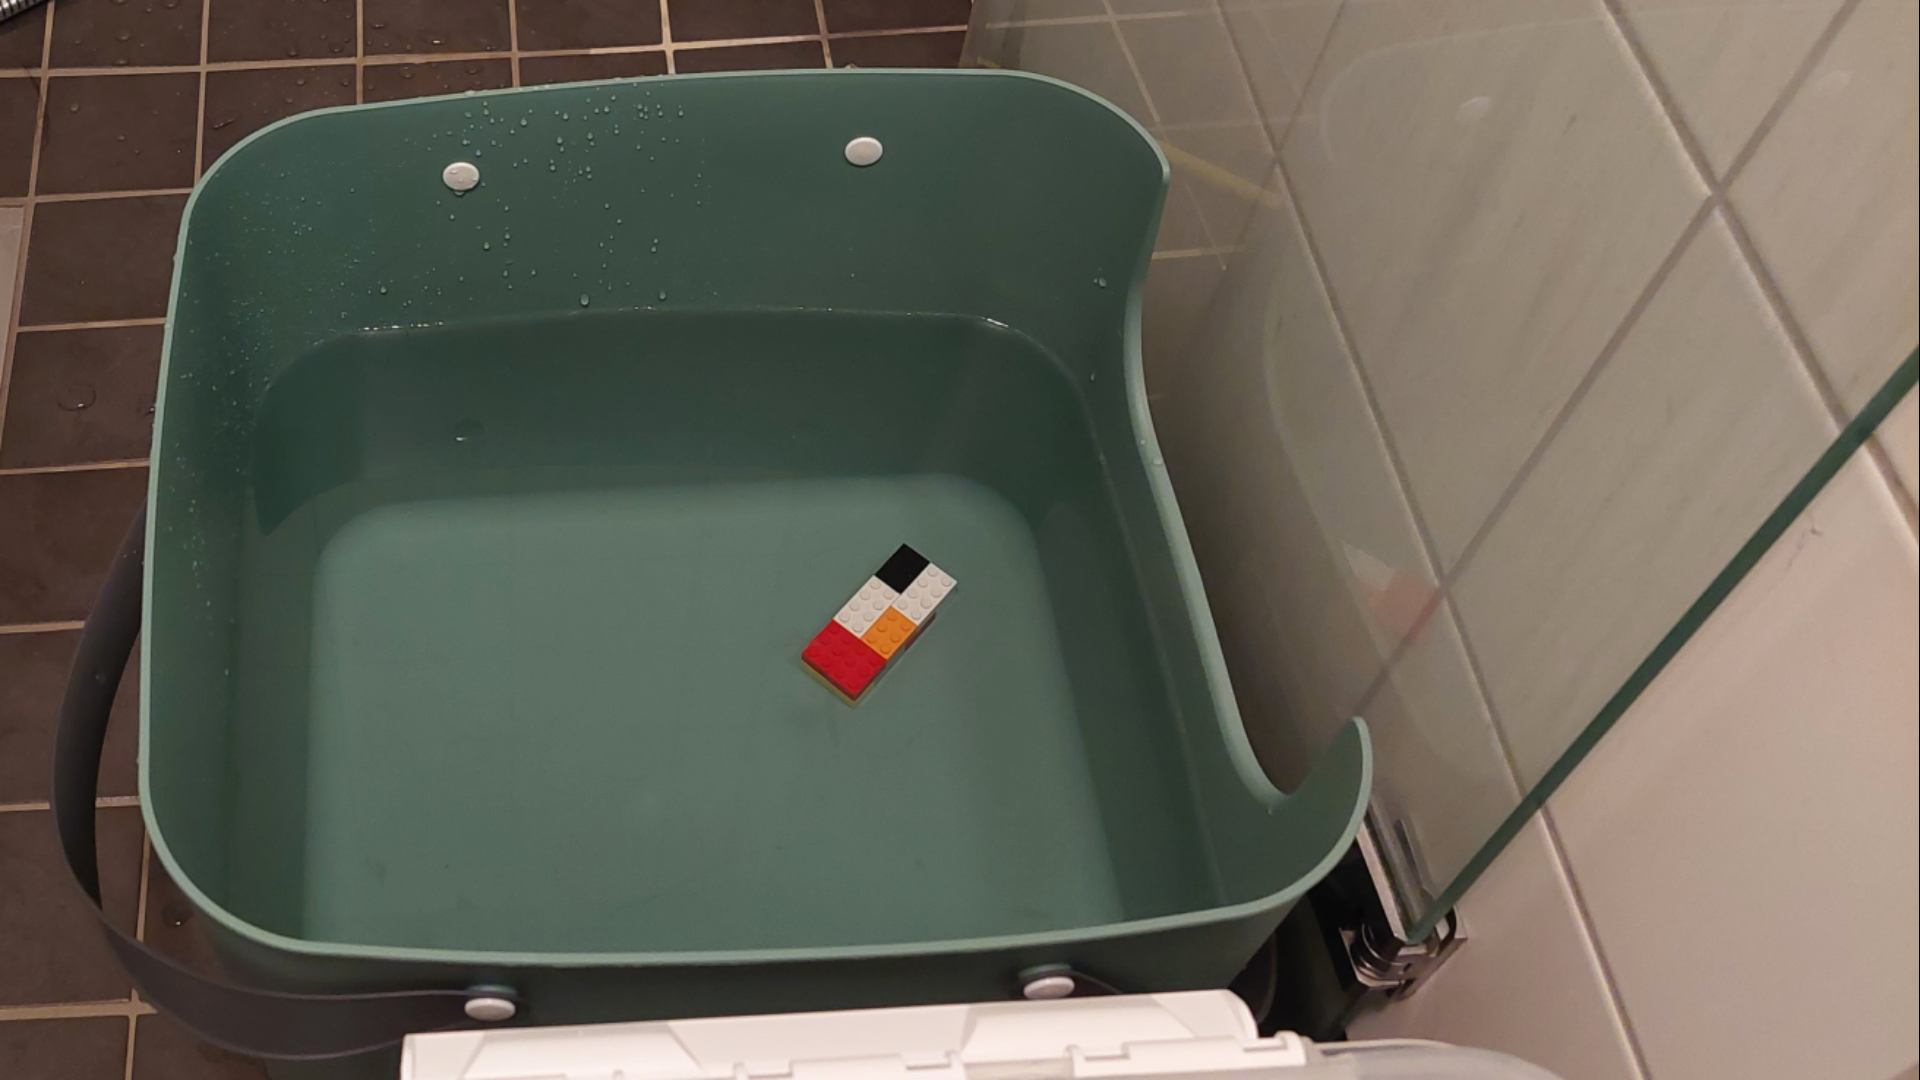

C:\Users\Matias\AppData\Local\Temp\ipykernel_8796\3138074745.py:3: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  real_demo_pic_resized = real_demo_pic.resize((64, 64), resample=Image.BICUBIC)


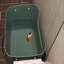

1/1 [==============================] - 0s 27ms/step
[[-0.30120164 -0.35440126  1.2090632  -0.3050396  -0.51822454 -0.55646694
   4.2957687  -0.13871795 -0.17453593 -0.16065776 -0.18379188 -0.24153985
  -0.17475607 -0.15039037 -0.16801938 -0.19358173 -0.20292404 -0.1809795
  -0.12234406 -0.2672875  -0.22751947 -0.18813162 -0.1727492  -0.2774886
  -0.15081051 -0.21222916 -0.22604804 -0.17871748 -0.21931033 -0.18693864
  -0.20835352 -0.18428262 -0.16187958 -0.16761148]]


In [9]:
real_demo_pic = Image.open("C:\\Users\\Matias\\_Thesis\\pictures\\Real\\demo2.png").convert('RGB')
display(real_demo_pic)
real_demo_pic_resized = real_demo_pic.resize((64, 64), resample=Image.BICUBIC)
display(real_demo_pic_resized)
print(model.predict( np.array( [np.array(real_demo_pic_resized),] )  ))
# Note to self
# Model seems to have learnt location relative to camera
# Start generating data with differing camera positions

In [10]:
test_predictions, loss = model.predict(x_val) #see what predict returns
#test_loss, test_acc = model.evaluate(x_val, y_val, verbose=0)
best_predictions = np.argsort(test_predictions)[-10:]
worst_predictions = np.argsort(test_predictions)[:10]

38/38 [==============================] - 4s 94ms/step


In [36]:
def threshold(x):
  return tf.where(x < 0.5, 0., 1.)

# Example usage:
tensor = tf.constant([0.1, 0.3, 0.6, 0.9, 1.2])
result = threshold(tensor)
print(result)

tf.Tensor([0. 0. 1. 1. 1.], shape=(5,), dtype=float32)
